## ニューラルネットワーク


- 適切な重みパラメータをデータから自動で学習できるという性質

- 入力層 → 中間層 → 出力層

- 中間層は「隠れ層」とも呼ぶ


#### パーセプトロンの復習

- *x1* と *x2* の2つの入力信号を受け取り、*y*を出力する

\begin{equation}
y = \left\{
\begin{array}{}
0 (b + w1x1 + w2x2 <= 0) \\
1 (b + w1x1 + w2x2 > 0)
\end{array}
\right.
\end{equation}

- *b* はバイアス。ニューロンの発火しやすさをコントロールするパラメータ。

- *w1*, *w2*は重み。各信号の重要性をコントロールするパラメータ。

- *h(x)* という関数を導入してパーセプトロンをシンプルな形に書き換える


\begin{equation}
y=h(b + w1x1 + w2x2)
\end{equation}

- この式は、入力信号の総和が *h(x)* という関数によって変換され、変換された値の出力が*y*になることを表している

\begin{equation}
h(x) = \left\{
\begin{array}{}
0 (x <= 0)  \\
1 (x > 0)
\end{array}
\right.
\end{equation}

- *h(x)* は入力が0以上のときに1を返し、そうでなければ0を返す

#### 活性化関数

- 入力信号の総和を出力信号に変換する関数: **活性化関数**(activation fucntion)

- 活性化関数は入力信号の総和がどのように発火するかを決める役割を持つ

  - ****$a = b + w1x1 + w2x2$****
  
  - ****$y = h(a)$****
  
  - ****$h()$****が**活性化関数**

- 単純パーセプトロンの活性化関数は**ステップ関数**

  - 閾値を境にして出力が切り替わる。階段関数とも呼ばれる
  
- 活性化関数をステップ関数から他の関数へ変更すると、ニューラルネットワークへと変わる

### シグモイド関数

- ****$h(x) = \cfrac{1}{1 + exp(-x)}$****

- ****$exp(-x)$****は****$e^{-x}$****を表す

- *e*は[ネイピア数](https://ja.wikipedia.org/wiki/%E3%83%8D%E3%82%A4%E3%83%94%E3%82%A2%E6%95%B0)の 2.7182... の実数を表す

### ステップ関数の実装

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

- この関数は実数は受け取ることができるが、numpy配列は引数に取れない

- numpy配列に対応した実装

In [2]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [3]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [4]:
y = x > 0
y

array([False,  True,  True])

In [5]:
y = y.astype(np.int)
y

array([0, 1, 1])

```
astype(np.int)
```
でbooleanをnp.int型に変換できる

### ステップ関数のグラフ

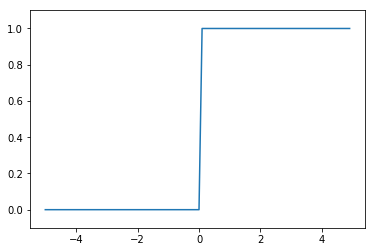

In [7]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### シグモイド関数の実装

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [9]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [10]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [11]:
1.0/t

array([1.        , 0.5       , 0.33333333])

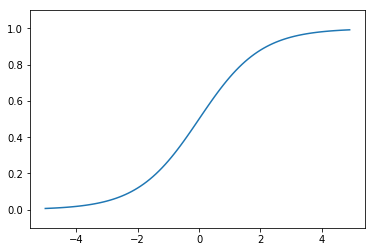

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

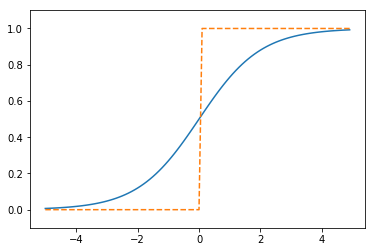

In [13]:
x1 = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x1)

plt.plot(x1, y1)

x2 = np.arange(-5.0, 5.0, 0.1)
y2 = step_function(x)
plt.plot(x2, y2, linestyle='--')
plt.ylim(-0.1, 1.1)
plt.show()

- シグモイド関数は出力が入力に対して滑らかに変化していることがわかる

- ステップ関数・シグモイド関数の共通点

  - 入力がどんなに大きくなっても、出力は1以内に押し込められる
  
  - 非線形関数である

### ReLU関数

- ReLU (Rectified Linear Unit)

- 入力が0を超えていれば、その入力をそのまま出力する。

- 0以下ならば0を出力する

ReLU関数の数式

\begin{equation}
h(x) = \left\{
\begin{array}{}
x (x > 0)\\
0 (x <= 0)
\end{array}
\right.
\end{equation}

In [14]:
def relu(x):
    return np.maximum(0, x)

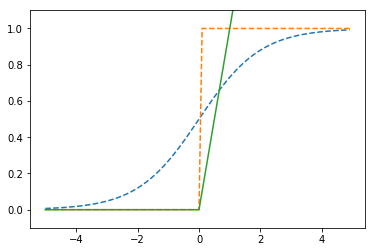

In [15]:
x = np.arange(-5.0, 5.0, 0.1)

y1 = sigmoid(x)
plt.plot(x, y1, linestyle='--')

y2 = step_function(x)
plt.plot(x, y2, linestyle='--')

y3 = relu(x)
plt.plot(x, y3)

plt.ylim(-0.1, 1.1)
plt.show()

### ニューラルネットワークの実装

In [16]:
import numpy as np

def sigmoid(x):
    """
    シグモイド関数
    """
    return 1/(1+np.exp(-x))

def relu(x):
    """
    ReLU関数
    """
    return np.maximum(0, x)

def init_network():
    """
    重み・バイアスの作成
    """
    network = {}
    # 第一層
    network['w1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    # 第二層
    network['w2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    # 第三層
    network['w3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def identity_function(x):
    """
    恒等関数。入力をそのまま出力する
    """
    return x

def forward(network, x):
    """
    入力から出力方向への伝達処理
    """
    w1, w2, w3 = network['w1'], network['w2'], network['w3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

# シグモイド関数: [0.31682708 0.69627909]
# ReLU関数: [0.426 0.912]

[0.31682708 0.69627909]


### 出力層で利用する活性化関数

- 回帰問題では恒等関数

  - 上記のidentity_function()が恒等関数にあたる
  
  - 入力をそのまま出力する

- ２クラス分類ではシグモイド関数

- 多クラス分類ではソフトマックス関数

### ソフトマックス関数

- 分類問題で使われる

- *n*個の出力層があるとき、*k*番目の出力****$y_{k}$****を求める

- 分子は入力信号****$a_{k}$****の指数関数、分母はすべての入力信号の指数関数の和

-  ****$y_{k} = \cfrac{exp(a_{k})}{\sum_{i=1}^{n} + exp(a_{i})}$****

### ソフトマックス関数の実装

In [17]:
import numpy as np
a = np.array([0.3, 2.9, 4.0])
# 指数関数
exp_a = np.exp(a)
exp_a

array([ 1.34985881, 18.17414537, 54.59815003])

In [18]:
sum_exp_a = np.sum(exp_a)
sum_exp_a

74.1221542101633

In [19]:
y = exp_a / sum_exp_a
y

array([0.01821127, 0.24519181, 0.73659691])

In [20]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

- ソフトマックス関数の実装では指数関数の計算を行う

- 指数関数が容易に大きな値になりうる

- 大きな値同士で除算すると数値が不安定な結果になる

  - NaNになる

In [21]:
import numpy as np

a = np.array([1010, 1000, 990])
np.exp(a)/np.sum(np.exp(a))

/Users/nao/Python/env/DLfromScratch/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/Users/nao/Python/env/DLfromScratch/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([nan, nan, nan])

### ソフトマックス関数の実装の改善

\begin{equation}
y_{k} = \cfrac{exp(a_{k})}{\sum_{i=1}^{n} + exp(a_{i})}
\end{equation}

\begin{equation}
= \cfrac{Cexp(a_{k})}{C\sum_{i=1}^{n}exp(a_{i})}
\end{equation}

\begin{equation}
= \cfrac{exp(a_{k} + logC)}{\sum_{i=1}^{n}exp(a_{i} + logC)}
\end{equation}

\begin{equation}
= \cfrac{exp(a_{k} + C{'})}{\sum_{i=1}^{n}exp(a_{i} + C{'})}
\end{equation}

- ソフトマックスの指数計算のときに、何らかの定数を加算・減算しても結果は変わらないことを利用している。

- オーバーフロー対策として、入力信号の最大値を用いるのが一般的。

In [22]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [23]:
np.exp(a - c)/np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

さきほど実装したソフトマックス関数を改善する

In [24]:
def softmax(a):
    c = np.max(a)
    # オーバーフロー対策
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [25]:
import numpy as np

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
y

array([0.01821127, 0.24519181, 0.73659691])

In [26]:
np.sum(y)

1.0

- ソフトマックス関数では出力の総和が1になる

  - 「確率」として解釈できる
  
上の例では、

```
y[0]の確率が0.018, y[1]の確率が0.245, y[2]の確率が0.737
```

のように解釈できる

- ニューラルネットワークのクラス分類では一般的に出力の一番大きいニューロンに相当するクラスのみ出力する

- ソフトマックス関数を適用しても出力の大きいニューロンの場所は変わらない

- 出力層ではソフトマックス関数を省略できる

### 出力層のニューロンの数

- クラス分類の問題では、分類したいクラスの数に設定するのが一般的

  - 入力された画像が数字の0~9のどれかを予測する問題では、出力層のニューロンは１０個に設定する
  
### 手書き数字認識

- 学習済みパラメータを使って、ニューラルネットワークの推論処理だけを実装する

    - ニューラルネットワークの順方向伝播(forward propagation)と呼ぶ

- MNISTという手書き数字のデータセットを用いる

    - 訓練画像60,000枚・テスト画像10,000枚

    - 28*28のグレー画像。各ピクセルは0から255までの値を取る
    
    - それぞれの画像には7, 2, 1といったように対応したラベルが与えられている

In [27]:
from dataset.mnist import load_mnist

# (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [28]:
x_train.shape

(60000, 784)

In [29]:
t_train.shape

(60000,)

In [30]:
x_test.shape

(10000, 784)

In [31]:
t_test.shape

(10000,)

#### MNIST画像を表示してみる

In [32]:
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)

# flatten=Trueで読み込まれた1次元データを28*28に再変形する
img = img.reshape(28, 28)

img_show(img)

5
(784,)


### ニューラルネットワークの推論処理

- MNISTデータセットに対して推論処理を行うニューラルネットワークを実装する

- 入力層を784個, 出力層を10個のニューロンで構成する

  - 784個: ラベルの数
  
  - 10個: 0 ~ 9のどの数字にあたるか
  
- 10クラス分類

- 2つの隠れ層

    1. 50個のニューロン
    
    2. 100個のニューロン
    
- 各隠れ層のニューロンの数は任意の値に設定できる

In [33]:
import pickle

import numpy as np

from dataset.mnist import load_mnist

def get_data():
    """
    テスト画像・テストラベルを取得する
    """
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open('dataset/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(a):
    c = np.max(a)
    # オーバーフロー対策
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y
        
def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)
    
    return y


x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    # 最も確率の高い要素のインデックスを取得
    p = np.argmax(y)
    
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy: {}".format(float(accuracy_cnt)/len(x)))

Accuracy: 0.9352
